# This notebook is intended to apply ML algorithms on IDS dataset for multiclass classification

##### Steps Followed
   1. Data Cleansing
   2. Feature selection
   3. Creation of Train/Test data
   4. Implementation of ML Algorithms
   5. Evalutaion

In [2]:
pip install modin

  Using cached https://files.pythonhosted.org/packages/33/77/f3dfedd9d99a8d53950d2c53da83db0c2e63e98f79e02403b6ed01f0566c/modin-0.6.3-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/63/e0/a1b39cdcb2c391f087a1538bc8a6d62a82d0439693192aef541d7b123769/pandas-0.25.3-cp37-cp37m-manylinux1_x86_64.whl
  Found existing installation: pandas 0.25.1
    Uninstalling pandas-0.25.1:
      Successfully uninstalled pandas-0.25.1
Note: you may need to restart the kernel to use updated packages.


In [1]:
# import modin.pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import time
from sklearn.metrics import accuracy_score

# import pickle
# from sklearn.naive_bayes import BernoulliNB
# from sklearn.naive_bayes import GaussianNB
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.model_selection import train_test_split     # import module for train test split

## 1. Data Cleansing

#### read all csv files

In [4]:
import glob
t1=time.time()

path = "../dataset/TrafficLabelling" # use your path
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)

df = pd.concat(li, axis=0, ignore_index=True)
t2=time.time()
print("time taken to read All csv :: ", t2-t1, " seconds ")

time taken to read All csv ::  41.73614192008972  seconds 


In [ ]:
df.groupby(' Label').first()

To request implementation, send an email to feature_requests@modin.org.


In [4]:
import statistics 

a=df_tuesday[df_tuesday[' Label']=='BENIGN'][' Bwd Packet Length Std']

# statistics.variance()
type(a)

pandas.core.series.Series

In [5]:
a=a.tolist()

In [6]:
statistics.variance(a)


82934.67732075289

In [9]:
import statistics 
a=df_tuesday[df_tuesday[' Label']=='SSH-Patator'][' Bwd Packet Length Std']
a=a.tolist()
statistics.variance(a)

12329.75354203784

In [10]:
df_tuesday.columns

Index(['Flow ID', ' Source IP', ' Source Port', ' Destination IP',
       ' Destination Port', ' Protocol', ' Timestamp', ' Flow Duration',
       ' Total Fwd Packets', ' Total Backward Packets',
       'Total Length of Fwd Packets', ' Total Length of Bwd Packets',
       ' Fwd Packet Length Max', ' Fwd Packet Length Min',
       ' Fwd Packet Length Mean', ' Fwd Packet Length Std',
       'Bwd Packet Length Max', ' Bwd Packet Length Min',
       ' Bwd Packet Length Mean', ' Bwd Packet Length Std', 'Flow Bytes/s',
       ' Flow Packets/s', ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max',
       ' Flow IAT Min', 'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std',
       ' Fwd IAT Max', ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean',
       ' Bwd IAT Std', ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags',
       ' Bwd PSH Flags', ' Fwd URG Flags', ' Bwd URG Flags',
       ' Fwd Header Length', ' Bwd Header Length', 'Fwd Packets/s',
       ' Bwd Packets/s', ' Min Packet Length', ' Max Pa

##### ==>> Finding and dropping undefined / incorrect values in data frame

In [4]:
df=df.dropna( axis=0, how='any')

In [3]:
df=df.replace(',,', np.nan, inplace=False)

<br>
We see that Fwd Header Length comes twice but with different anmes so first change name of Fwd Header Length.1 to Fwd Header Length and then remove it

In [13]:
df_tuesday_dup_rem = df_tuesday_dropped.loc[:,~df_tuesday_dropped.columns.duplicated()]
len(df_tuesday_dup_rem.columns)

85

In [6]:
df.drop(columns=[' Fwd Header Length.1'], axis=1, inplace=True)

In [7]:
len(df.columns)


84


##### ==>>convert categorical and string data to numerical data
Flow ID, Source IP, Destination IP, Timestamp, External IP <br>
using LabelEncoder of sklearn

In [9]:
from sklearn import preprocessing      # import required package for labelencoding
le=preprocessing.LabelEncoder()        # create a label encoder (category) object
le.fit(df['Flow ID'])

LabelEncoder()

In [10]:
# labels
le.classes_
# Apply fitted encoder to the pandas column
le.transform(df["Flow ID"])

array([ 819574,  819732, 1085070, ...,  428373,  602218,  961807])

In [11]:
le_s_ip=preprocessing.LabelEncoder()
le_s_ip.fit(df[' Source IP'])
le_s_ip.transform(df[' Source IP'])

array([ 4721,  4721, 16487, ...,  4713,  4721,  4722])

In [12]:
le_d_ip=preprocessing.LabelEncoder()
le_d_ip.fit(df[' Destination IP'])
le_d_ip.transform(df[' Destination IP'])

array([ 5453,  5453, 18363, ..., 10351,  5452, 18797])

In [13]:
le_time_stamp=preprocessing.LabelEncoder()
le_time_stamp.fit(df[' Timestamp'])
le_time_stamp.transform(df[' Timestamp'])

array([27904, 27904, 27905, ..., 27419, 27419, 27419])

In [15]:
group=df.groupby(' Label')
group.first()

,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,Total Backward Packets,...,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
Label,,,,,,,,,,,,,,,,,,,,,
BENIGN,192.168.10.3-192.168.10.50-3268-56108-6,192.168.10.50,56108,192.168.10.3,3268,6,7/7/2017 8:59,112740690,32,16,...,15,32,359.428571,11.998016,380.0,343.0,16100000.0,498804.82030,16400000.0,15400000.0
Bot,192.168.10.12-52.6.13.28-42544-8080-6,192.168.10.12,42544,52.6.13.28,8080,6,7/7/2017 9:34,60202640,9,9,...,1,32,63678.200000,22252.535960,103175.0,50911.0,10200000.0,34941.27201,10200000.0,10100000.0
DDoS,172.16.0.1-192.168.10.50-49650-80-6,172.16.0.1,49650,192.168.10.50,80,6,7/7/2017 3:56,1293792,3,7,...,2,20,0.000000,0.000000,0.0,0.0,0.0,0.00000,0.0,0.0
DoS GoldenEye,172.16.0.1-192.168.10.50-58958-80-6,172.16.0.1,58958,192.168.10.50,80,6,5/7/2017 11:10,5008837,4,5,...,1,32,0.000000,0.000000,0.0,0.0,0.0,0.00000,0.0,0.0
DoS Hulk,172.16.0.1-192.168.10.50-50748-80-6,172.16.0.1,50748,192.168.10.50,80,6,5/7/2017 10:43,1878,3,6,...,1,32,0.000000,0.000000,0.0,0.0,0.0,0.00000,0.0,0.0
DoS Slowhttptest,172.16.0.1-192.168.10.50-33372-80-6,172.16.0.1,33372,192.168.10.50,80,6,5/7/2017 10:15,16045,5,3,...,1,32,0.000000,0.000000,0.0,0.0,0.0,0.00000,0.0,0.0
DoS slowloris,172.16.0.1-192.168.10.50-49631-80-6,172.16.0.1,49631,192.168.10.50,80,6,5/7/2017 2:24,5169956,8,6,...,7,20,0.000000,0.000000,0.0,0.0,0.0,0.00000,0.0,0.0
FTP-Patator,172.16.0.1-192.168.10.50-45422-80-6,172.16.0.1,45422,192.168.10.50,80,6,4/7/2017 10:30,5216127,3,1,...,0,32,0.000000,0.000000,0.0,0.0,0.0,0.00000,0.0,0.0
Heartbleed,172.16.0.1-192.168.10.51-45022-444-6,172.16.0.1,45022,192.168.10.51,444,6,5/7/2017 3:12,119302728,2685,1729,...,118,32,2217.000000,0.000000,2217.0,2217.0,5024984.0,0.00000,5024984.0,5024984.0


In [16]:
df[[' Flow Packets/s', 'Flow Bytes/s']].replace('Infinity', -1, inplace=True)
df[[' Flow Packets/s', 'Flow Bytes/s']].replace('NaN', 0, inplace=True)

/home/ebryx/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4263: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [23]:
df=df_tuesday_dropped

# 2. Feature Selection

Adding features with most importance for ssh patator and ftp patator 
1. FW Packet length max 

2. flow duration
3. flow packets/s
4. fwd IAt total
5. flow IAT std

6. Fwd packet length std
7. fwd packet length mean
8. total length of backward packets
9. flow bytes/s
10. total length of fwd packets
11. flow iat mean

and some other features that give good results for
12. Bot(Bwd Packet Length Mean)
13. DDos(Bwd Packet Length Std)
14. DDos golden eye (Flow IAT Max)
15. Total Fwd Packets
16. Total Backward Packets'


In [17]:
features=[" Fwd Packet Length Max"," Flow IAT Std"," Fwd Packet Length Std" ,"Fwd IAT Total",' Flow Packets/s',' Flow Duration', " Fwd Packet Length Mean", " Total Length of Bwd Packets", "Flow Bytes/s", "Total Length of Fwd Packets", " Flow IAT Mean", " Bwd Packet Length Mean",  " Flow IAT Max", " Bwd Packet Length Std", ' Total Fwd Packets', ' Total Backward Packets'," Label"]
df=df[features].copy()
df.head()

,Fwd Packet Length Max,Flow IAT Std,Fwd Packet Length Std,Fwd IAT Total,Flow Packets/s,Flow Duration,Fwd Packet Length Mean,Total Length of Bwd Packets,Flow Bytes/s,Total Length of Fwd Packets,Flow IAT Mean,Bwd Packet Length Mean,Flow IAT Max,Bwd Packet Length Std,Total Fwd Packets,Total Backward Packets,Label
0,403.0,5.798698e+06,204.724205,113000000.0,0.425755776,112740690,201.5,1152.0,67.41133126,6448.0,2.398738e+06,72.0,16400000.0,0.0,32,16,BENIGN
1,403.0,5.798710e+06,204.724205,113000000.0,0.425756267,112740560,201.5,5056.0,102.0395854,6448.0,2.398735e+06,316.0,16400000.0,0.0,32,16,BENIGN
2,0.0,1.395543e+06,0.000000,114000000.0,4.790898088,113757377,0.0,0.0,0,0.0,2.091128e+05,0.0,20800000.0,0.0,545,0,BENIGN
3,28.0,2.183302e+04,0.000000,100126.0,219.7231488,100126,28.0,0.0,6152.248167,616.0,4.767905e+03,0.0,100055.0,0.0,22,0,BENIGN
4,0.0,3.046984e+04,0.000000,54760.0,73.04601899,54760,0.0,0.0,0,0.0,1.825333e+04,0.0,53431.0,0.0,4,0,BENIGN


In [25]:
df=data_frame_for_patator

In [26]:
df.head()

,Fwd Packet Length Max,Flow IAT Std,Fwd Packet Length Std,Fwd IAT Total,Flow Packets/s,Flow Duration,Fwd Packet Length Mean,Total Length of Bwd Packets,Flow Bytes/s,Total Length of Fwd Packets,Flow IAT Mean,Bwd Packet Length Mean,Flow IAT Max,Bwd Packet Length Std,Total Fwd Packets,Total Backward Packets,Label
0,220,135.557286,107.349008,640.0,17187.5,640,62.857143,358.0,1246875,440,64.000000,89.5,445.0,103.345698,7,4,BENIGN
1,300,192.795228,132.287566,900.0,14444.44444,900,66.666667,2944.0,3937777.778,600,75.000000,736.0,684.0,849.859596,9,4,BENIGN
2,1388,236.433336,677.274651,1205.0,9128.630705,1205,396.571429,2830.0,4652282.158,2776,120.500000,707.5,777.0,816.950631,7,4,BENIGN
3,226,90.767652,110.276708,511.0,21526.41879,511,64.571429,370.0,1608610.568,452,51.100000,92.5,299.0,106.809800,7,4,BENIGN
4,306,148.698266,134.933317,773.0,16817.59379,773,68.000000,2944.0,4600258.732,612,64.416667,736.0,531.0,849.859596,9,4,BENIGN


### Saved preprocessed cleaned data to cleaned folder

In [19]:
df.to_csv("../dataset/Cleaned/multiclass-multidays.csv")

In [2]:
df=pd.read_csv("../dataset/Cleaned/multiclass-multidays.csv")

/home/ebryx/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (5,9) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# Correlation
<br> 

### if going for training and testing models <i>skip</i> this step of correlation

#### Preprocessing

In [21]:
df.replace("Infinity", 0, inplace=True)
df['Flow Bytes/s'].replace("Infinity", 0,inplace=True)
df[" Flow Packets/s"].replace("Infinity", 0, inplace=True)

In [22]:
df["Flow Bytes/s"]=df["Flow Bytes/s"].astype("float")
df[' Flow Packets/s']=df[" Flow Packets/s"].astype("float")
df.dtypes

Unnamed: 0                        int64
 Fwd Packet Length Max          float64
 Flow IAT Std                   float64
 Fwd Packet Length Std          float64
Fwd IAT Total                   float64
 Flow Packets/s                 float64
 Flow Duration                    int64
 Fwd Packet Length Mean         float64
 Total Length of Bwd Packets    float64
Flow Bytes/s                    float64
Total Length of Fwd Packets     float64
 Flow IAT Mean                  float64
 Bwd Packet Length Mean         float64
 Flow IAT Max                   float64
 Bwd Packet Length Std          float64
 Total Fwd Packets                int64
 Total Backward Packets           int64
 Label                           object
dtype: object

#### Removing unnecessary column

In [23]:

df2=df[df.columns[1:-1]]
df2[' Label']=df[df.columns[-1]]
df=df2

/home/ebryx/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [32]:
df.columns

Index([' Fwd Packet Length Max', ' Flow IAT Std', ' Fwd Packet Length Std',
       'Fwd IAT Total', ' Flow Packets/s', ' Flow Duration',
       ' Fwd Packet Length Mean', ' Total Length of Bwd Packets',
       'Flow Bytes/s', 'Total Length of Fwd Packets', ' Flow IAT Mean',
       ' Bwd Packet Length Mean', ' Flow IAT Max', ' Bwd Packet Length Std',
       ' Total Fwd Packets', ' Total Backward Packets', ' Label'],
      dtype='object')

Text(0, 0.5, 'Attack')

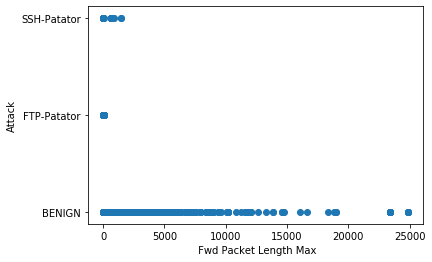

In [34]:
plt.scatter(df[" Fwd Packet Length Max"], df[" Label"])
plt.xlabel(" Fwd Packet Length Max")
plt.ylabel("Attack")


In [ ]:
plt.plot(df[[' Fwd Packet Length Max', ' Flow IAT Std', ' Fwd Packet Length Std',
       'Fwd IAT Total', ' Flow Packets/s', ' Flow Duration',
       ' Fwd Packet Length Mean', ' Total Length of Bwd Packets',
       'Flow Bytes/s', 'Total Length of Fwd Packets', ' Flow IAT Mean',
       ' Bwd Packet Length Mean', ' Flow IAT Max', ' Bwd Packet Length Std',
       ' Total Fwd Packets', ' Total Backward Packets', ' Label']], df[" Label"])
plt.xlabel(" Fwd Packet Length Max")
plt.ylabel("Attack")



Text(0, 0.5, 'Attack')

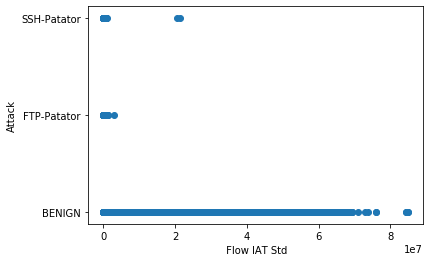

In [33]:
plt.scatter(df[" Flow IAT Std"], df[" Label"])
plt.xlabel(" Flow IAT Std")
plt.ylabel("Attack")


In [ ]:

plt.scatter(df[" Fwd Packet Length Std"], df[" Label"])
plt.xlabel(" Fwd Packet Length Stdl")
plt.ylabel("Attack")


In [ ]:
plt.scatter(df["Fwd IAT Total"], df[" Label"])
plt.xlabel("Fwd IAT Total")
plt.ylabel("Attack")


In [ ]:
plt.scatter(df[" Fwd Packet Length Std"], df[" Label"])
plt.xlabel(" Fwd Packet Length Std")
plt.ylabel("Benign")


In [ ]:
plt.scatter(df[' Flow Duration'], df[" Label"])
plt.xlabel(' Flow Duration')
plt.ylabel("Attack")


In [ ]:
plt.scatter(df[" Fwd Packet Length Mean"], df[" Label"])
plt.xlabel(" Fwd Packet Length Mean")
plt.ylabel("Attack")


In [ ]:
plt.scatter(df[" Total Length of Bwd Packets"], df[" Label"])
plt.xlabel(" Total Length of Bwd Packets")
plt.ylabel("Benign")


In [ ]:
plt.scatter(df["Flow Bytes/s"], df[" Label"])
plt.xlabel("Flow Bytes/s")
plt.ylabel("Attack")


In [ ]:
plt.scatter(df[" Flow Packets/s"], df[" Label"])
plt.xlabel(" Flow Packets/s")
plt.ylabel("Attack")


In [ ]:
plt.scatter(df["Total Length of Fwd Packets"], df[" Label"])
plt.xlabel("Total Length of Fwd Packets")
plt.ylabel("Attack")


In [ ]:
plt.scatter(df[" Flow IAT Mean"], df[" Label"])
plt.xlabel(" Flow IAT Mean")
plt.ylabel("Attack")


In [ ]:
plt.scatter(df[" Bwd Packet Length Mean"], df[" Label"])
plt.xlabel(" Bwd Packet Length Mean")
plt.ylabel("Attack")


In [ ]:
plt.scatter(df[" Flow IAT Max"], df[" Label"])
plt.xlabel(" Flow IAT Max")
plt.ylabel("Attack")


In [ ]:
plt.scatter(df[" Bwd Packet Length Std"], df[" Label"])
plt.xlabel(" Bwd Packet Length Std")
plt.ylabel("Attack")


In [ ]:
plt.scatter(df[" Total Fwd Packets"], df[" Label"])
plt.xlabel(" Total Fwd Packets")
plt.ylabel("Attack")


In [ ]:
plt.scatter(df[" Total Backward Packets"], df[" Label"])
plt.xlabel(" Total backward Packets")
plt.ylabel("Attack")


### Separating data for Benign, ssh and ftp attacks

In [35]:
df_ftp=df[df[' Label']=='FTP-Patator']
df_ssh=df[df[' Label']=='SSH-Patator']
df_benign=df[df[' Label']=='BENIGN']

In [36]:
df_ftp.head(10)

,Fwd Packet Length Max,Flow IAT Std,Fwd Packet Length Std,Fwd IAT Total,Flow Packets/s,Flow Duration,Fwd Packet Length Mean,Total Length of Bwd Packets,Flow Bytes/s,Total Length of Fwd Packets,Flow IAT Mean,Bwd Packet Length Mean,Flow IAT Max,Bwd Packet Length Std,Total Fwd Packets,Total Backward Packets,Label
11337,0,3.010454e+06,0.000000,5216127.0,0.766852,5216127,0.0,0.0,0.000000e+00,0,1.738709e+06,0.000000,5214882.0,0.000000,3,1,FTP-Patator
11338,0,0.000000e+00,0.000000,0.0,100000.000000,20,0.0,0.0,0.000000e+00,0,2.000000e+01,0.000000,20.0,0.000000,1,1,FTP-Patator
11339,0,0.000000e+00,0.000000,0.0,52631.578950,38,0.0,0.0,0.000000e+00,0,3.800000e+01,0.000000,38.0,0.000000,1,1,FTP-Patator
11340,0,0.000000e+00,0.000000,0.0,25000.000000,80,0.0,0.0,0.000000e+00,0,8.000000e+01,0.000000,80.0,0.000000,1,1,FTP-Patator
11341,0,0.000000e+00,0.000000,0.0,29411.764710,68,0.0,0.0,0.000000e+00,0,6.800000e+01,0.000000,68.0,0.000000,1,1,FTP-Patator
11342,0,0.000000e+00,0.000000,0.0,42553.191490,47,0.0,0.0,0.000000e+00,0,4.700000e+01,0.000000,47.0,0.000000,1,1,FTP-Patator
11344,0,0.000000e+00,0.000000,0.0,24096.385540,83,0.0,0.0,0.000000e+00,0,8.300000e+01,0.000000,83.0,0.000000,1,1,FTP-Patator
11345,14,7.141778e+01,9.899495,265.0,11320.754720,265,7.0,0.0,5.283019e+04,14,1.325000e+02,0.000000,183.0,0.000000,2,1,FTP-Patator
11346,22,9.779900e+05,9.633276,3302859.0,3.633216,3302859,6.0,76.0,3.391002e+01,36,3.002599e+05,12.666667,3248752.0,14.678783,6,6,FTP-Patator
11347,14,0.000000e+00,9.899495,3.0,666666.666700,3,7.0,0.0,4.666667e+06,14,3.000000e+00,0.000000,3.0,0.000000,2,0,FTP-Patator


In [37]:
df_ssh.head(20)

,Fwd Packet Length Max,Flow IAT Std,Fwd Packet Length Std,Fwd IAT Total,Flow Packets/s,Flow Duration,Fwd Packet Length Mean,Total Length of Bwd Packets,Flow Bytes/s,Total Length of Fwd Packets,Flow IAT Mean,Bwd Packet Length Mean,Flow IAT Max,Bwd Packet Length Std,Total Fwd Packets,Total Backward Packets,Label
161915,0,0.0000,0.000000,404.0,4950.495050,404,0.000000,0.0,0.000000,0,404.0000,0.000000,404.0,0.000000,2,0,SSH-Patator
161916,640,534015.4383,166.685104,5808851.0,5.680986,5808851,99.733333,2297.0,652.969064,1496,181526.5937,127.611111,1978974.0,288.171342,15,18,SSH-Patator
161977,640,504075.2867,155.799100,5840763.0,6.334789,5840763,82.222222,2297.0,646.662088,1480,162243.4167,120.894737,1976459.0,281.578269,18,19,SSH-Patator
161978,640,511031.6261,159.195034,5797001.0,6.210108,5797001,87.058824,2297.0,651.543790,1480,165628.6000,120.894737,1964335.0,281.578269,17,19,SSH-Patator
161979,640,523350.2299,166.542430,5776990.0,5.885418,5776990,98.666667,2297.0,653.800682,1480,175060.3030,120.894737,1971363.0,281.578269,15,19,SSH-Patator
161980,0,0.0000,0.000000,0.0,100000.000000,20,0.000000,0.0,0.000000,0,20.0000,0.000000,20.0,0.000000,1,1,SSH-Patator
161981,0,0.0000,0.000000,0.0,28985.507250,69,0.000000,0.0,0.000000,0,69.0000,0.000000,69.0,0.000000,1,1,SSH-Patator
161982,640,541158.1943,159.195034,6114814.0,5.887342,6114814,87.058824,2297.0,617.680276,1480,174708.9714,120.894737,2056251.0,281.578269,17,19,SSH-Patator
161983,0,0.0000,0.000000,0.0,23809.523810,84,0.000000,0.0,0.000000,0,84.0000,0.000000,84.0,0.000000,1,1,SSH-Patator
161984,0,0.0000,0.000000,0.0,34482.758620,58,0.000000,0.0,0.000000,0,58.0000,0.000000,58.0,0.000000,1,1,SSH-Patator


In [38]:
df_benign.head(20)

,Fwd Packet Length Max,Flow IAT Std,Fwd Packet Length Std,Fwd IAT Total,Flow Packets/s,Flow Duration,Fwd Packet Length Mean,Total Length of Bwd Packets,Flow Bytes/s,Total Length of Fwd Packets,Flow IAT Mean,Bwd Packet Length Mean,Flow IAT Max,Bwd Packet Length Std,Total Fwd Packets,Total Backward Packets,Label
0,220,1.355573e+02,107.349008,640.0,1.718750e+04,640,62.857143,358.0,1.246875e+06,440,6.400000e+01,89.500000,445.0,103.345698,7,4,BENIGN
1,300,1.927952e+02,132.287566,900.0,1.444444e+04,900,66.666667,2944.0,3.937778e+06,600,7.500000e+01,736.000000,684.0,849.859596,9,4,BENIGN
2,1388,2.364333e+02,677.274651,1205.0,9.128631e+03,1205,396.571429,2830.0,4.652282e+06,2776,1.205000e+02,707.500000,777.0,816.950631,7,4,BENIGN
3,226,9.076765e+01,110.276708,511.0,2.152642e+04,511,64.571429,370.0,1.608611e+06,452,5.110000e+01,92.500000,299.0,106.809800,7,4,BENIGN
4,306,1.486983e+02,134.933317,773.0,1.681759e+04,773,68.000000,2944.0,4.600259e+06,612,6.441667e+01,736.000000,531.0,849.859596,9,4,BENIGN
5,1550,1.821085e+02,683.485755,986.0,1.521298e+04,986,344.444444,3030.0,6.217039e+06,3100,7.042857e+01,505.000000,696.0,782.342636,9,6,BENIGN
6,1537,1.873619e+02,677.753294,935.0,1.604278e+04,935,341.555556,3010.0,6.506952e+06,3074,6.678571e+01,501.666667,714.0,777.178658,9,6,BENIGN
7,1646,1.016422e+05,562.935859,572849.0,4.713284e+01,572849,271.733333,1020.0,8.895887e+03,4076,2.203265e+04,85.000000,517763.0,91.222007,15,12,BENIGN
8,0,7.071068e-01,0.000000,1.0,3.000000e+06,1,0.000000,0.0,0.000000e+00,0,5.000000e-01,0.000000,1.0,0.000000,2,1,BENIGN
9,1550,1.678878e+02,683.485755,1075.0,1.674419e+04,1075,344.444444,3030.0,5.702326e+06,3100,6.323529e+01,336.666667,709.0,668.052206,9,9,BENIGN


### Standard deviation of features for benign data

In [39]:
ben_std={}

cols = list(df.columns[0:-1])
for col in cols:
    ben_std[col+str('_std')] = df_benign[col].values.std()

# converting to series for further processing
ben_std = pd.Series(ben_std) 
print(ben_std)

 Fwd Packet Length Max_std          4.778144e+02
 Flow IAT Std_std                   5.860450e+06
 Fwd Packet Length Std_std          1.487513e+02
Fwd IAT Total_std                   2.986306e+07
 Flow Packets/s_std                 2.303280e+05
 Flow Duration_std                  2.999846e+07
 Fwd Packet Length Mean_std         1.147536e+02
 Total Length of Bwd Packets_std    2.668090e+06
Flow Bytes/s_std                    2.359402e+07
Total Length of Fwd Packets_std     5.766572e+03
 Flow IAT Mean_std                  4.317292e+06
 Bwd Packet Length Mean_std         3.151428e+02
 Flow IAT Max_std                   1.362517e+07
 Bwd Packet Length Std_std          2.880370e+02
 Total Fwd Packets_std              8.810475e+02
 Total Backward Packets_std         1.191054e+03
dtype: float64


### Standard deviation of features for FTP Attack data

In [40]:
ftp_std={}

cols = list(df.columns[0:-1])
for col in cols:
    ftp_std[col+str('_std')] = df_ftp[col].values.std()
    
# converting to series for further processing
ftp_std = pd.Series(ftp_std) 
print(ftp_std)

 Fwd Packet Length Max_std          5.572105e+00
 Flow IAT Std_std                   5.125854e+05
 Fwd Packet Length Std_std          8.459415e-01
Fwd IAT Total_std                   3.028068e+06
 Flow Packets/s_std                 3.058386e+05
 Flow Duration_std                  4.526970e+06
 Fwd Packet Length Mean_std         2.493508e+00
 Total Length of Bwd Packets_std    9.391640e+01
Flow Bytes/s_std                    2.128678e+06
Total Length of Fwd Packets_std     4.633285e+01
 Flow IAT Mean_std                  1.976268e+05
 Bwd Packet Length Mean_std         6.267051e+00
 Flow IAT Max_std                   1.636901e+06
 Bwd Packet Length Std_std          7.274986e+00
 Total Fwd Packets_std              3.499639e+00
 Total Backward Packets_std         7.186003e+00
dtype: float64


### Standard deviation of features for SSH Attack data

In [41]:
ssh_std={}

cols = list(df.columns[0:-1])
for col in cols:
    ssh_std[col+str('_std')] = df_ssh[col].values.std()
    
# converting to series for further processing
ssh_std = pd.Series(ssh_std) 
print(ssh_std)

 Fwd Packet Length Max_std          3.205947e+02
 Flow IAT Std_std                   4.977605e+05
 Fwd Packet Length Std_std          7.029028e+01
Fwd IAT Total_std                   5.177558e+06
 Flow Packets/s_std                 3.303134e+04
 Flow Duration_std                  6.515325e+06
 Fwd Packet Length Mean_std         4.778573e+01
 Total Length of Bwd Packets_std    1.383771e+03
Flow Bytes/s_std                    8.710135e+03
Total Length of Fwd Packets_std     1.006857e+03
 Flow IAT Mean_std                  1.378822e+05
 Bwd Packet Length Mean_std         4.367718e+01
 Flow IAT Max_std                   2.416856e+06
 Bwd Packet Length Std_std          1.110300e+02
 Total Fwd Packets_std              1.012242e+01
 Total Backward Packets_std         1.552835e+01
dtype: float64


### Dataframe containing standard deviations 

In [42]:
# Converting dataframes containing standard deviations of benign,ftp and ssh attack into single dataframe
frame = { 'benign': ben_std, 'ftp': ftp_std, 'ssh':ssh_std } 
  
df_std_all = pd.DataFrame(frame) 
print(df_std_all)

                                        benign           ftp           ssh
 Fwd Packet Length Max_std        4.778144e+02  5.572105e+00  3.205947e+02
 Flow IAT Std_std                 5.860450e+06  5.125854e+05  4.977605e+05
 Fwd Packet Length Std_std        1.487513e+02  8.459415e-01  7.029028e+01
Fwd IAT Total_std                 2.986306e+07  3.028068e+06  5.177558e+06
 Flow Packets/s_std               2.303280e+05  3.058386e+05  3.303134e+04
 Flow Duration_std                2.999846e+07  4.526970e+06  6.515325e+06
 Fwd Packet Length Mean_std       1.147536e+02  2.493508e+00  4.778573e+01
 Total Length of Bwd Packets_std  2.668090e+06  9.391640e+01  1.383771e+03
Flow Bytes/s_std                  2.359402e+07  2.128678e+06  8.710135e+03
Total Length of Fwd Packets_std   5.766572e+03  4.633285e+01  1.006857e+03
 Flow IAT Mean_std                4.317292e+06  1.976268e+05  1.378822e+05
 Bwd Packet Length Mean_std       3.151428e+02  6.267051e+00  4.367718e+01
 Flow IAT Max_std        

In [43]:
df_std_all['benign'][' Fwd Packet Length Max_std']

477.81442694319674

In [44]:
dummy_variable_1 = pd.get_dummies(df[" Label"])
print(dummy_variable_1.head())

   BENIGN  FTP-Patator  SSH-Patator
0       1            0            0
1       1            0            0
2       1            0            0
3       1            0            0
4       1            0            0


In [45]:
df=pd.concat([df,dummy_variable_1], axis=1)
# drop original column "fuel-type" from "df"
df2=df
df2.drop(" Label", axis=1,inplace=True)

In [46]:
df2.head()

,Fwd Packet Length Max,Flow IAT Std,Fwd Packet Length Std,Fwd IAT Total,Flow Packets/s,Flow Duration,Fwd Packet Length Mean,Total Length of Bwd Packets,Flow Bytes/s,Total Length of Fwd Packets,Flow IAT Mean,Bwd Packet Length Mean,Flow IAT Max,Bwd Packet Length Std,Total Fwd Packets,Total Backward Packets,BENIGN,FTP-Patator,SSH-Patator
0,220,135.557286,107.349008,640.0,17187.500000,640,62.857143,358.0,1246875.000,440,64.000000,89.5,445.0,103.345698,7,4,1,0,0
1,300,192.795228,132.287566,900.0,14444.444440,900,66.666667,2944.0,3937777.778,600,75.000000,736.0,684.0,849.859596,9,4,1,0,0
2,1388,236.433336,677.274651,1205.0,9128.630705,1205,396.571429,2830.0,4652282.158,2776,120.500000,707.5,777.0,816.950631,7,4,1,0,0
3,226,90.767652,110.276708,511.0,21526.418790,511,64.571429,370.0,1608610.568,452,51.100000,92.5,299.0,106.809800,7,4,1,0,0
4,306,148.698266,134.933317,773.0,16817.593790,773,68.000000,2944.0,4600258.732,612,64.416667,736.0,531.0,849.859596,9,4,1,0,0


In [47]:
df2.corr()

,Fwd Packet Length Max,Flow IAT Std,Fwd Packet Length Std,Fwd IAT Total,Flow Packets/s,Flow Duration,Fwd Packet Length Mean,Total Length of Bwd Packets,Flow Bytes/s,Total Length of Fwd Packets,Flow IAT Mean,Bwd Packet Length Mean,Flow IAT Max,Bwd Packet Length Std,Total Fwd Packets,Total Backward Packets,BENIGN,FTP-Patator,SSH-Patator
Fwd Packet Length Max,1.000000,0.074171,0.937929,0.327251,-0.073050,0.335562,0.755894,0.011508,0.052141,0.475382,0.023319,0.306854,0.152487,0.435585,0.016060,0.015279,0.009631,-0.044007,0.036321
Flow IAT Std,0.074171,1.000000,0.068273,0.549577,-0.064885,0.550325,0.038495,-0.001414,-0.015027,0.014755,0.723880,0.047638,0.885692,0.102695,-0.000414,-0.000772,0.031815,-0.022093,-0.022717
Fwd Packet Length Std,0.937929,0.068273,1.000000,0.285157,-0.047402,0.295267,0.785647,-0.000385,0.134821,0.378279,0.017334,0.269075,0.136058,0.445085,0.003140,0.002220,0.017477,-0.036904,0.016190
Fwd IAT Total,0.327251,0.549577,0.285157,1.000000,-0.091669,0.998441,0.099928,0.022537,-0.021202,0.107352,0.429530,0.258439,0.650915,0.406910,0.028190,0.026821,0.040024,-0.034262,-0.021090
Flow Packets/s,-0.073050,-0.064885,-0.047402,-0.091669,1.000000,-0.093705,-0.060372,-0.002048,0.259364,-0.020527,-0.054210,-0.136261,-0.076255,-0.114376,-0.002737,-0.002899,-0.010725,0.033063,-0.021993
Flow Duration,0.335562,0.550325,0.295267,0.998441,-0.093705,1.000000,0.105585,0.022749,-0.021673,0.109022,0.429139,0.265112,0.653232,0.416398,0.028443,0.027100,0.033695,-0.028565,-0.018078
Fwd Packet Length Mean,0.755894,0.038495,0.785647,0.099928,-0.060372,0.105585,1.000000,-0.002587,0.135348,0.419554,0.011364,0.111474,0.068929,0.182102,-0.000435,-0.001315,0.035975,-0.046577,-0.000690
Total Length of Bwd Packets,0.011508,-0.001414,-0.000385,0.022537,-0.002048,0.022749,-0.002587,1.000000,0.000680,0.034740,-0.001553,0.049668,0.003314,0.023136,0.998168,0.997066,0.001447,-0.001117,-0.000903
Flow Bytes/s,0.052141,-0.015027,0.134821,-0.021202,0.259364,-0.021673,0.135348,0.000680,1.000000,0.005555,-0.012555,-0.026724,-0.017652,-0.024832,0.000582,0.000462,0.007115,-0.003379,-0.006887
Total Length of Fwd Packets,0.475382,0.014755,0.378279,0.107352,-0.020527,0.109022,0.419554,0.034740,0.005555,1.000000,0.000083,0.085192,0.049795,0.099971,0.041776,0.040531,0.002084,-0.011156,0.009751


{'whiskers': [<matplotlib.lines.Line2D at 0x7f30b70e8bd0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f30b70e38d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f30b70e3910>],
 'medians': [<matplotlib.lines.Line2D at 0x7f30b70df510>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f30b70e83d0>],
 'means': []}

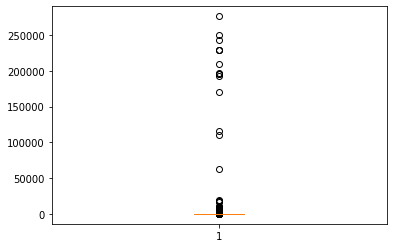

In [48]:
plt.boxplot(df[' Total Backward Packets'])

In [ ]:


import seaborn as sns
sns.set(style="whitegrid")
ax = sns.boxplot(x=df[[ ' Flow Packets/s']])

### End of correlation. Start of Normal flow of work

 Separate input features and labels from dataframe


In [3]:
X=df[df.columns[1:-1]]
y=df[df.columns[-1]]
X.dtypes

 Fwd Packet Length Max          float64
 Flow IAT Std                   float64
 Fwd Packet Length Std          float64
Fwd IAT Total                   float64
 Flow Packets/s                  object
 Flow Duration                    int64
 Fwd Packet Length Mean         float64
 Total Length of Bwd Packets    float64
Flow Bytes/s                     object
Total Length of Fwd Packets     float64
 Flow IAT Mean                  float64
 Bwd Packet Length Mean         float64
 Flow IAT Max                   float64
 Bwd Packet Length Std          float64
 Total Fwd Packets                int64
 Total Backward Packets           int64
dtype: object

In [4]:
X.replace("Infinity", 0, inplace=True)
X['Flow Bytes/s'].replace("Infinity", 0,inplace=True)
X[" Flow Packets/s"].replace("Infinity", 0, inplace=True)

/home/ebryx/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4278: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,
/home/ebryx/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:6786: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [5]:
X["Flow Bytes/s"]=X["Flow Bytes/s"].astype("float")
X[' Flow Packets/s']=X[" Flow Packets/s"].astype("float")
X.dtypes

/home/ebryx/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/ebryx/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


 Fwd Packet Length Max          float64
 Flow IAT Std                   float64
 Fwd Packet Length Std          float64
Fwd IAT Total                   float64
 Flow Packets/s                 float64
 Flow Duration                    int64
 Fwd Packet Length Mean         float64
 Total Length of Bwd Packets    float64
Flow Bytes/s                    float64
Total Length of Fwd Packets     float64
 Flow IAT Mean                  float64
 Bwd Packet Length Mean         float64
 Flow IAT Max                   float64
 Bwd Packet Length Std          float64
 Total Fwd Packets                int64
 Total Backward Packets           int64
dtype: object

#### Display all rows in column as will be mentioned

In [ ]:
pd.set_option('display.max_rows', df_wednesday.shape[0])
pd.set_option('display.max_columns', df_wednesday.shape[1])

# X_train.head(3)

### Normalize Data
normalize data using z score so it is easy for our model to learn and outlier could be handled here

In [6]:
from scipy import stats

In [7]:
t1=time.time()

cols = list(X.columns)
for col in cols:
    X[col] = stats.zscore(X[col])
    
t2=time.time()
print("time ::: ", t2-t1 , " seconds to find z score of " , len(cols), "features")

/home/ebryx/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


time :::  0.9755640029907227  seconds to find z score of  16 features



##  3. Creation of Training and testing data


In [8]:
from sklearn.model_selection import train_test_split     # import module for train test split

In [9]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2, random_state=10)

In [58]:
X_test.head(1000)

,Fwd Packet Length Max,Flow IAT Std,Fwd Packet Length Std,Fwd IAT Total,Flow Packets/s,Flow Duration,Fwd Packet Length Mean,Total Length of Bwd Packets,Flow Bytes/s,Total Length of Fwd Packets,Flow IAT Mean,Bwd Packet Length Mean,Flow IAT Max,Bwd Packet Length Std,Total Fwd Packets,Total Backward Packets
282978,-0.267542,-0.252580,-0.340132,-0.356875,-0.151739,-0.364797,-0.013694,-0.008195,0.056352,-0.076865,-0.211028,0.014617,-0.296853,-0.446744,-0.011306,-0.010161
414911,-0.367004,-0.252596,-0.340132,-0.356875,-0.256608,-0.363704,-0.428831,-0.008328,-0.059499,-0.093419,-0.203406,-0.547351,-0.294447,-0.446744,-0.012459,-0.011014
422681,-0.367004,-0.252596,-0.340132,-0.356875,-0.050357,-0.364801,-0.428831,-0.008328,-0.059499,-0.093419,-0.211031,-0.547351,-0.296862,-0.446744,-0.012459,-0.011014
189739,-0.248496,2.449914,-0.308173,2.528044,-0.256875,2.507581,0.030469,-0.008162,-0.059498,-0.056788,2.634744,-0.197325,2.198604,-0.406637,-0.009000,-0.008455
130843,-0.276007,-0.252596,-0.340132,-0.356875,-0.256589,-0.363780,-0.049025,-0.008301,-0.059336,-0.085846,-0.203930,-0.319352,-0.294613,-0.446744,-0.012459,-0.011014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298804,-0.318331,-0.252579,-0.340132,-0.356875,-0.154227,-0.364797,-0.225679,-0.008311,-0.036062,-0.085318,-0.211027,-0.473492,-0.296852,-0.446744,-0.011306,-0.010161
415277,-0.367004,-0.252596,-0.340132,-0.356875,-0.178023,-0.364799,-0.428831,-0.008328,-0.059499,-0.093419,-0.211015,-0.547351,-0.296857,-0.446744,-0.012459,-0.011014
67766,0.485830,1.618372,1.058001,3.550848,-0.256874,3.540732,1.350957,-0.007945,-0.059496,0.900211,0.451248,-0.316141,3.800174,-0.446744,0.018673,0.000074
115252,-0.269658,-0.252596,-0.340132,-0.356875,-0.256774,-0.361906,-0.022527,-0.008299,-0.059436,-0.085318,-0.190903,-0.296874,-0.290487,-0.446744,-0.012459,-0.011014


## 4. Applying ML algorithms

### 1) K-NN

In [10]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
t1=time.time()

for i in range(len(cols)):
    knn=KNeighborsClassifier(n_neighbors=(i+1))
    model_knn=knn.fit(X_train,y_train)
    yhat=model_knn.predict(X_test)
    print("for " , i+1,  " as K, accuracy is : ", accuracy_score(y_test, yhat))
t2=time.time()
print(" time for ", i+1 ," k's :: ", (t2-t1)/60 , " minutes")

for  1  as K, accuracy is :  0.9807979472570895
for  2  as K, accuracy is :  0.9825333067079949
for  3  as K, accuracy is :  0.9826039934473393
for  4  as K, accuracy is :  0.9835564972600053
for  5  as K, accuracy is :  0.9842615974849658


### save knn_model for future use

In [ ]:
import pickle
filename = './multiclass_multidays/model.sav'

In [ ]:

pickle.dump(model_knn, open(filename, 'wb'))

In [ ]:

# load the model from disk
model_knn = pickle.load(open(filename, 'rb'))
y_hat=model_knn.predict(X_test)


### 2) Naive bayes

#####     2.1) Gaussian naive bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
t1=time.time()

gnb = GaussianNB()
model_gnb = gnb.fit(X_train, y_train)
yhat=model_gnb.predict(X_test)

print("Accuracy :: ", accuracy_score(y_test,yhat))

t2=time.time()
print(" time for Naive Baye's :: ", (t2-t1) , " seconds")

results for gausian naive bayes are not very good, so we use bernoulli Naive Bayes

##### 2.2) Bernoulli Naive Bayes

In [ ]:
from sklearn.naive_bayes import BernoulliNB

In [ ]:
clf = BernoulliNB()
clf.fit(X_train, y_train)
yhat=clf.predict(X_test)
print("Accuracy ::: ", accuracy_score(y_test,yhat))

#### Scatter plot

In [ ]:
plt.scatter(y_test,yhat)

In [ ]:
type(y_test)

In [ ]:
type(yhat)

In [ ]:
y_test_arr=y_test.as_matrix()

In [ ]:

true_benign=0
true_ftp=0
true_ssh=0
false_benign=0
false_ftp=0
false_ssh=0
print(len(y_test_arr))
for x in range(len(y_test_arr)):
    if y_test_arr[x]==yhat[x] and y_test_arr[x]=="BENIGN":
        true_benign=true_benign+1
    elif y_test_arr[x]==yhat[x] and y_test_arr[x]=="FTP-Patator":
        true_ftp=true_ftp+1
    elif y_test_arr[x]==yhat[x] and y_test_arr[x]=="SSH-Patator":
        true_ssh=true_ssh+1
    elif y_test_arr[x]!=yhat[x]:
        if yhat[x]=="BENIGN":
            false_benign=false_benign+1
        elif yhat[x]=="FTP-Patator":
            false_ftp=false_ftp+1
        elif yhat[x]=="SSH-Patator":
            false_ssh=false_ssh+1
print("true benign  ::: ", true_benign )
print("true ftp  ::: ", true_ftp )
print("true ssh  ::: ", true_ssh )
print("false benign  ::: ", false_benign )
print("false ftp ::: ", false_ftp )
print("fasle ssh  ::: ", false_ssh )

In [ ]:
# y_hat= saved model output
true_benign=0
true_ftp=0
true_ssh=0
false_benign=0
false_ftp=0
false_ssh=0

for x in range(len(y_test_arr)):
    
    if y_hat[x]=="BENIGN":
        if y_hat[x]==y_test_arr[x]:
            true_benign=true_benign+1
        else:
            false_benign=false_benign+1
            
    elif y_hat[x]=="FTP-Patator":
        
        if y_hat[x]==y_test_arr[x]:
            true_ftp=true_ftp+1
        else:
            false_ftp=false_ftp+1
            
    elif y_hat[x]=="SSH-Patator":
        if y_hat[x]==y_test_arr[x]:
            true_ssh=true_ssh+1
        else:
            false_ssh=false_ssh+1
            
print("true benign  ::: ", true_benign )
print("true ftp  ::: ", true_ftp )
print("true ssh  ::: ", true_ssh )
print("false benign  ::: ", false_benign )
print("false ftp ::: ", false_ftp )
print("fasle ssh  ::: ", false_ssh )

## Visualization of results

### 1. Pie Chart

In [ ]:
ser={}
ser['true_benign']=true_benign
ser['true ftp']=true_ftp
ser['true ssh']=true_ssh
ser['false benign']=false_benign
ser['false ftp']=false_ftp
ser['false ssh']=false_ssh

In [ ]:
series = pd.Series(ser) 


In [ ]:
colors_list = ['skyblue', 'yellowgreen', 'red', 'pink', 'black', 'blue']
explode_list = [0, 0.1, 0, 0.4, 0.6, 0.8] # ratio for each continent with which to offset each wedge.

series.plot(kind='pie',
                            figsize=(8, 10),
                            autopct='%1.1f%%',
                            startangle=25,# add in percentages
#                           shadow=False,
                            labels=None,
                            pctdistance=1.12, 
                            explode=explode_list,
                            colors=colors_list,  # add custom colors

           )

plt.title('KNN results ', y=1.12) 

plt.axis('equal') 

# add legend
plt.legend(labels=series.index, loc='upper right') 

plt.show()

#### Pie chart with TP,FP,TN,FN

In [ ]:
ser3={}
ser3['true positive']=true_ftp+true_ssh
ser3['true negative']=true_benign
ser3['false positive']=false_ftp+false_ssh
ser3['false negative']=false_benign

In [ ]:
series3 = pd.Series(ser3) 


In [ ]:
colors_list = ['red', 'gray','black', 'skyblue' ]
explode_list = [0, 0.2, 0.8, 0.4] # ratio for each continent with which to offset each wedge.

series3.plot(kind='pie',
                            figsize=(8, 10),
                            autopct='%1.1f%%',
                            startangle=25,# add in percentages
#                           shadow=False,
                            labels=None,
                            pctdistance=1.12, 
                            explode=explode_list,
                            colors=colors_list,  # add custom colors

           )

plt.title('KNN results ', y=1.12) 

plt.axis('equal') 

# add legend
plt.legend(labels=series3.index, loc='upper right') 

plt.show()